<a href="https://colab.research.google.com/github/oskigr8/DSI_Notes_Strategy/blob/master/Intro_to_Python_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# some libraries we will use
import pandas as pd
import numpy as np
from collections import Counter
from itertools import permutations  
from math import factorial
import random

# Welcome to Intro to Python part 3

In this session, we will first be briefly covering some of the common objects leveraged in data science with Python that you were not exposed to in part 1 and part 2. These are specifically iterators and generators. 

An iterator is an object that enables a programmer to traverse a container, particularly lists and arrays. Similar to functions which return arrays, Generators are routines which leverage that functionality in order to return only a yielded subset of an array. 

After touching on these concepts, we will begin our introduction to using math and statistics in python. This will break down as follows:
- Operators and their uses
- Basic statistics (measures of central tendency, 5 measure summary, standard deviation, and variance)
- Sets (set attributes, permutations, combinations, and factorials)
- Basic Probability (frequentist theory )
- Common plots (matplotlib.pyplot library demo)

# Iterators

### What are iterators? 

There are three key parts to python iterators:
- An iterator is an object that contains a countable number of values.

- An iterator is an object that can be iterated upon, meaning that you can traverse through all the values.

```
- In Python, an iterator is an object which implements the iterator protocol, which consist of the methods __iter__()" and __next__().
```


### What can we use them for?

iterators leverage the concept of lazy evaluation. What that means is, the iterator only perform computations as explicitly directed on a subset of the data. This is extremely useful if you have an excessively Big Data set. You can perform analyses on a subset of the data using a generator while the rest of the data loads in. 


In [ ]:
# Here is a simple prime number checking function. we will use this after we create the iterator
def check_prime(number):    
  for divisor in range(2, int(number ** 0.5) + 1):       
     if number % divisor == 0:            
       return False    
     return True

# instantiate primes class
# It has __iter__() and __next__() magic methods because, in python, an iterator 
# class requires their inclusion in order to perform iteration

class Primes:    
  def __init__(self, max):        
    self.max = max        
    self.number = 1
# Watch what happens when i hash out the magic methods, below 
  def __iter__(self):
    return self
  def __next__(self):
    self.number += 1        
    if self.number >= self.max:            
      raise StopIteration        
    elif check_prime(self.number):            
      return self.number        
    else:            
      return self.__next__()


In [ ]:
primes = Primes(20)

# Print out the object itself

print(primes) 

# use iteration to get individual entries from generator
for x in primes:    
  print(x)

TypeError: ignored

# Generators

### What are Generators?
Generator functions allow the declaration of a function that behaves like an iterator. 

Courtesy of [Wikipedia](https://en.wikipedia.org/wiki/Generator_(computer_programming)) "A generator is very similar to a function that returns an array, in that a generator has parameters, can be called, and generates a sequence of values. However, instead of building an array containing all the values and returning them all at once, a generator yields the values one at a time, which requires less memory and allows the caller to get started processing the first few values immediately. In short, a generator looks like a function but behaves like an iterator."

Another key difference is the "yield" statement, which is called in place of return for generator functions. While "return" will terminate a function entirely, yield instead pauses the function, preserving its states, and allowing for the function to pick up again following another yield. Unlike normal functions, the local variables are not destroyed when the function yields. 

Furthermore, the generator object can be iterated only once. Therefore, you need to reinstantiate a function in order to restart the generation. if you get the 'StopIteration:' error message, this is what happened.

### What can we use them for? 

### Resources for generators:
- https://wiki.python.org/moin/Generators
- https://realpython.com/introduction-to-python-generators/#example-1-reading-large-files
- https://www.programiz.com/python-programming/generator




In [ ]:
def simple_gen():
    n = 'This is printed first'
    yield n

    n = 'This is printed second'
    yield n

    n = 'This is printed at last'
    yield n

In [ ]:
# instantiate function call
a = simple_gen()

# use 'next' method to advance the iteration of the generator. has to be done at each step
print(next(a))
# use 'next' method to advance the iteration of the generator
print(next(a))
# use 'next' method to advance the iteration of the generator
print(next(a))



This is printed first
This is printed second
This is printed at last


In [ ]:
# What would happen if i tried to call next(a) again?

next(a)

StopIteration: ignored

In [ ]:
# Heres another example not derived from one of those links i shared
# As you can see, generators can be situationally very useful 
# for reducing computational cost. an infinite sequence like this is a good example
def fibonacci_sequence():
    n1, n2 = 0, 1
    count = 0
    while count == 0:
      yield n1
      count +=1
    while count != 0:
          output = n1
          nth = n1 + n2
          n1 = n2
          n2 = nth
          count += 1
          yield output
          

b = fibonacci_sequence()

In [ ]:
for i in range(10):
  print(next(b))

0
0
1
1
2
3
5
8
13
21


# Using Python for Statistics and Math

Python is arguably one of the best languages for performing mathematical analyses and calculations. Python has numerous built in functionalities and libraries that are meant for this purpose. 

Some libraries to check out and explore on your own for math and stats:
- math
- scipy
- numpy
- scikit-learn



##Operators in python:

###Arithmetic operators
most of the mathematical operators you are familiar with will be conserved within python. lets look at the common operators and their associated represenations in Python:
- Plus is '+'
- Minus is '-'
- Multiplication is '*'
- Division is '/'
- Exponents are represented by '**' example: 3xx2 = 9
- Modulo is '%'. this operator returns the remainder of the division between the two numbers. example: 5 % 3 = 2 because 5 divides evenly into groups of 3 exactly 1 time, and that leaves a remainder of 2. 
- Floor division is represented by '//' and it gives you the result of division without a remainder. example: 5//3 = 1 because 5 divides evenly into groups of 3 exactly 1 time. The remainder 2 is not of concern. 




In [ ]:
# Operators in python:
# Arithmetic operators
# most of the mathematical operators you are familiar with will be conserved within python
# lets look at the common operators:

# Plus is '+'
print(f'the addition operator, plus, is used for 3 + 2 to equal {3+2} \n') #<-fun tip, use \n with strings to go to the next line 
# Minus is '-'
print(f'the subtraction operator, minus, is used for 3 - 2 to equal {3-2} \n')
# Multiplication is '*'
print(f'the multiplication operator, multiply by, is used for 3 * 2 to equal {3*2} \n')
# Division is '/'
print(f'the division operator, divided by, is used for 3 / 2 to equal {3/2} \n')
# Exponents are represented with '**'
print(f'the exponential operator, **, is used for 3 ** 2 to equal {3**2} \n')

# modulo is '%'. this operator returns the remainder of the division between the two numbers
print(f'the modulo operator is used for 5 % 3 to equal {5%3} \n')
# floor division is represented by '//' and it gives you the result of division without a remainder
print(f'the floor division operator, //, is used for 5 // 3 to equal {5//3}')

the addition operator, plus, is used for 3 + 2 to equal 5 

the subtraction operator, minus, is used for 3 - 2 to equal 1 

the multiplication operator, multiply by, is used for 3 * 2 to equal 6 

the division operator, divided by, is used for 3 / 2 to equal 1.5 

the exponential operator, **, is used for 3 ** 2 to equal 9 

the modulo operator is used for 5 % 3 to equal 2 

the floor division operator, //, is used for 5 // 3 to equal 1


In [ ]:
# Assignment operators: these are used to assign values/update values to variables
# equal sign is represented by "=". Remember that the = sign often tests for 
# boolean truth when used in compsci

# the equal to operator, =, is used for 2+3 = 5 to show the result of an equation

# Plus equal sign means that you take the variables assigned value and add to it

x = 1
x += 2
print(f'x += 2 is equal to {x} \n') 

# the reverse is true for the minus equal sign

y = 2
y -= 1
print(f'2 -= 1 is equal to {y} \n')

# this can also be applied to multiplication..

z = 3
z *= 2
print(f'z *= 2 is equal to {z} \n')

# and division
z /= 2
print(f'z /= 2 is equal to {z}')


x += 2 is equal to 3 

2 -= 1 is equal to 1 

z *= 2 is equal to 6 

z /= 2 is equal to 3.0


In [ ]:
round(1/3,2)

0.33

# Basic functions: measures of central tendency
A good place to start with using math with python are measures of central tendency.

heres a simple list of all the numbers between 1 and 10:


In [ ]:
lst = [1,2,3,4,5,6,7,8,9,10]

# lets start by calculating the mean. what is a mean?

# Mean: the mean function outputs the average of the numbers in an array

def mean(lst):
  output = 0
  for i in lst:
    output += i
  return output/(len(lst))

# question: what is the mean of lst?
mean(lst)


5.5

In [ ]:
# Mode: the mode is the most common object in a list of objects. 

def my_mode(sample):
  c = Counter(sample)
  return [k for k, v in c.items() if v == c.most_common(1)[0][1]]


lst = ['James', 'john', 'john', 'james', 'john', 'James']

# Question: what is the mode of lst?
my_mode(lst)

['john']

In [ ]:
# The median: the median is the central object is the number that is in the center of an ordered list.
# You need to approach median with the consideration of length of the array: 
# an even length array will take the mean of the two central objects.
#  in this case, 6+5/2 = 5.5 so our mean is qual to our median
# an odd length array simply takes the central object

samp2 = [1,3,2,4,3,7,8,1,2,3]

def median(lst):
    length = len(lst)
    sorted_lst = sorted(lst)
    # Lists with an odd number of items in the list
    if length % 2 != 0:
        idx = (length / 2 + .5) - 1
        return sorted_lst[int(idx)]
    # Lists with an even number of items in the list
    else:
        idx1 = int(length / 2 - 1)
        idx2 = int(idx1 + 1)
        # lets use our new mean function!
        return mean([sorted_lst[idx1], sorted_lst[idx2]])


# whats the median of samp2?
median(samp2)

3.0

In [ ]:
# len: len is not a measure of central tendency, but seemed relevant to include.
# use len to calculate the length of a list, array, etc.

lst = [1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

len(lst)

31

In [ ]:
# Range: range is not a measure of central tendency, but seemed relevant to include.
# use range to get all numbers between 2 integers, and it is exclusive. that means 
# the second number listed will not be included in the range

# here are some ways you can use range
print(range(0,10))
# use list to get all the numbers
print(list(range(0,11)))
# use len to find the length
print(len(range(0,10)))



range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10


In [ ]:
# The five number summary: This is very useful when performing exploratory data
# analysis on a new data set. It gives us the minimum and maximum values, the median, 
# and the values that represent the endpoints of the various interquartile ranges

from numpy import percentile
from numpy.random import rand

# generate data sample
data = rand(1000)

# calculate quartiles using numpy's percentile method to get 
# 25th, 50th, and 75th percentiles: the 1st, 2nd, and third quartile values
quartiles = percentile(data, [25, 50, 75])

# calculate min/max
data_min, data_max = data.min(), data.max()

# print 5-number summary

print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)


print(f'this is my {data_max:.2f}')

Min: 0.001
Q1: 0.256
Median: 0.522
Q3: 0.783
Max: 1.000
this is my 1.00


In [ ]:
from statistics import variance

In [ ]:
# Variance: A measure of how far from their mean the individual observations in our data are.
# Variance reflects how consistent our data is. 

# for example: low variance data would be: 
lowv = [1,1,1,1,1,1,1,1,1,1]
# high variance data would be
highv = [10000,1,5,100000000000,2,36,2887, 12,-150, 29, 413]



def variance(data):
     # Number of observations
     n = len(data)
     # Mean of the data
     mean = sum(data) / n
     # Square deviations
     deviations = [(x - mean) ** 2 for x in data]
     # Variance
     variance = sum(deviations) / n
     return variance

print(f'the non-existent variance of lowv is {variance(lowv)} \n')
print(f'the absurdly high variance of highv is {variance(highv)}')


# Note: this is a calculation of population variance, which considers the entire data set.
# if you were to calculate the sample variance, you would need to use "n-1" rather than "n"
# for our calculations to account for a sample of a population's variance 
# rather than the variance for the entire population

the non-existent variance of lowv is 0.0 

the absurdly high variance of highv is 8.264462591157109e+20


In [ ]:
# Standard deviation is the square root of the variance and measures 
# the amount of variation or dispersion of a dataset.

# Calculating standard deviation:
def std_dev(a):
  out = variance(a)
  return (out**.5)

lst = [3, 5, 2, 7, 1, 3]
print(variance(lst))
print(variance(lst)**.5)
std_dev(lst)


4.7
2.16794833886788


2.16794833886788

# Sets: 

Sets are used to store multiple items in a single variable.

Set is one of 4 built-in data types in Python used to store collections of data, the other 3 are List, Tuple, and Dictionary, all with different qualities and usage.

A set is a collection which is both unordered and unindexed.

Sets are written with curly brackets. ex: {}

Sets are hashed collections of data. This means there cannot be repeated instances of an object in a set. This means no set will contain duplicates

Once a set is created, you cannot change its items, but you can add new items. 



In [ ]:
# Because sets are unordered, they will automatically sort themselves when output

# what will we get when we print the set('hello')?
set('hello')

{'e', 'h', 'l', 'o'}

In [ ]:
# set methods

s = {1,2,3,4,5}

s.add(7)
s

{1, 2, 3, 4, 5, 7}

In [ ]:
s.remove(1)
s

{2, 3, 4, 5, 7}

In [ ]:
# you can combine sets using the union method. 
x = {1,2,3}
y = {3,4,5}

z = x.union(y)
print(z)

{1, 2, 3, 4, 5}


In [ ]:
# use .difference() method to find differences between two sets

x = {1,2,3,4,5}
y = {3,4,5,6,7}

a = x.difference(y)
print(a)

print(y.difference(x))
# can also be used with string sets. because i isnt in 'hello'
#  it isnt a part of difference. the reverse is also true, 
# with i being the only output of the seconnd call
print(set('hello').difference('hi'))
set('hi').difference('hello')

# Sign up for Galvanize basic prep at the following link to learn more: https://www.galvanize.com/data-science/prep

{1, 2}
{6, 7}
{'l', 'e', 'o'}


{'i'}

More definitions to know: 

Permutations: A permutation is an arrangement of all or part of a set of objects, with regard to the order of the arrangement. For example, suppose we have a set of three letters: A, B, and C. we might ask how many ways we can arrange 2 letters from that set.

Cartesian product: When dealing with 2 sets, The cartesian product represents all possible combinations the objects in the two sets

factorial: represented by n!, a factorial multiplies the initial n by every number between it and 1. ex: 4! = 4x3x2x1


(see formulas below)

In [ ]:
set1 = {'blue', 'red','green'}
set2 = {'ball', 'bat', 'toy'}


# lets use itertools permutations method to get all the unique combinations of these two sets
unique_combinations = [] 

permut = permutations(set1, len(set2)) 

# zip() is called to pair each permutation 
# and shorter list element into combination 
for comb in permut: 
    zipped = zip(comb, set2) 
    unique_combinations.append(list(zipped)) 
  
# printing unique_combination list  
print(unique_combinations) 
print(len(unique_combinations))

[[('blue', 'toy'), ('green', 'bat'), ('red', 'ball')], [('blue', 'toy'), ('red', 'bat'), ('green', 'ball')], [('green', 'toy'), ('blue', 'bat'), ('red', 'ball')], [('green', 'toy'), ('red', 'bat'), ('blue', 'ball')], [('red', 'toy'), ('blue', 'bat'), ('green', 'ball')], [('red', 'toy'), ('green', 'bat'), ('blue', 'ball')]]
6


In [ ]:
# if we just want to get the count for the total number or permutations,
#  we can skip all that

# the formula for permutations is nPr= n!/(n−r)!
# heres what that looks like in python

def permutations1(n, r):
    # Make the calculation and return the value
    return factorial(n) / factorial(n - r)

print(permutations1(3, 3))


6.0


### Combinatorics: 


a field of mathematics concerned with counting the possible orderings and combinations of elements within a set, has many applications in data science, including database architecture and graph theory. Here, we will be using it in the service of our probability studies to calculate the number of possible events within a sample space.

Combinations: A combination is a selection of all or part of a set of objects, without regard to the order in which objects are selected. For example, suppose we have a set of three letters: A, B, and C. we might ask how many ways we can select 2 letters from that set.

The difference between combinations and permutations is ordering. With permutations we care about the order of the elements, whereas with combinations we don't. For example, a password of "12345" for an account couldnt use "54231" as the password.

Much like the cartesian product, factorial, and permutations, simply calculating the number of possible combinations (cardinality of a give sample space) can be used to calculate a probability, see below for an example:

the formula is nCr=n!/(n−r)!*r!

with n representing the number of total possibilities, and r representing the number of possibilities of

In [ ]:
# heres the formula!
def combinations(n, r):
    # Make the calculation and return the value
    return factorial(n) / (factorial(n - r) * factorial(r))

print(combinations(4,2))

6.0


## Challenge question

your company is moving to a new office, and will upgrade many of its employees computers. Of the 30 employees moving into the new office, the company will only be able 
to provide new computers for 25 of the employees; out of fairness the 
company has decided to choose who gets the new computers in a lottery. 
If the marketing department has 5 employees, what is the probability that none 
of them will be recieving one of the new computers?

In [ ]:
# first determine our n and our r
# n = 30
# r = 5
# then use our combinations formula to get our denominator
# combinations(30,)

# combinations(30,5) = 142506.0

# We can assume the numerator here, because there is only 1 possibility that 
# every member of marketing doesn't get a computer. its far more likely that only a few are not selected.
# therefore, the probability that none of them will 
# be recieving one of the new computers = 1/combinations(30,5) or 1/142506.0

1/combinations(30,3)


0.0002463054187192118

Plotting: 

Plotting data is the process of taking data points and representing them 2 dimensionally (or any 3 dimensionally) on a grid or other representative figure. This allows us to observe the relationship between any data points within the set. 



In [ ]:
def coin_flipper(n):
  lst = []
  coin = ['heads', 'tails']
  for i in range(n+1):
    lst.append(random.choice(coin))
  return lst

In [ ]:
# now lets set up to plot these results in a bar chart
plotting = coin_flipper(30)

coin = ['heads', 'tails']

# im going to use these to get the heights 
count_heads = 0
count_tails = 0

for i in plotting:
  if i == 'heads':
    count_heads +=1
  else:
    count_tails +=1

# Frequentist probability: 

if you have ever weighed the odds of a decision, you've likely used frequentist probability theory to do so. 

It can be defined as follows:
The probability of some event A occuring is the magnitude of the number of possible outcomes in that event, divided by the magnitude of the total number of possible outcomes in the sample space.

This equation is shown as probability of (A) or P(A) = |A|/|S|

Event probabilities can be either dependent or independent of other events. 

### Dependence:
Even though a single random experiment generates only a single outcome, this single outcome can induce the occurrence of multiple events, it can even be defined as an event itself. Two events are dependent if the outcome of the first event affects the outcome of the second event, so that the probability is changed.

example: if you have 3 red balls in a jar, and 3 blue balls in a jar, and you remove one red ball, then the probability of pulling a blue ball changes from 1/2 to 3/5

### Independence:
Two events are independent, statistically independent, or stochastically independent if the occurrence of one does not affect the probability of occurrence of the other.

P(A) = P(A|B) = P(A|BC)

example: If i have two jars with ten red and ten blue balls in them, and remove one ball from the first jar, the probability of pulling a blue ball from the second jar is unaffected.

###sample question: Given a fair six-sided die, what is the probability of rolling a 5?

To calculate this, we take the number of sides divided by the number of possibilities we want to account for. in this case, 1 is the amount of instances we want to account for, and 6 is the number of total possibilities. therefore, 1/6 or .1666667 is the probability of rolling a 5. 

 





### More terminology: 

-P(A)	= Probability of A

-P(Ac) = Probability of A complement

Complement: A mutually exclusive pair of events are complements to each other. For example: If the desired outcome is heads on a flipped coin, the complement is tails.

- P(A∩B) = Probability of A intersect B

Intersect: The probability that Events A and B both occur is the probability of the intersection of A and B. The probability of the intersection of Events A and B is denoted by P(A ∩ B). If Events A and B are mutually exclusive, P(A ∩ B) = 0.

-P(A∪B) = Probability of A union B

Union: The probability that Events A or B occur is the probability of the union of A and B. This is if either occurs, rather than specifically both. think of it as "or" to intersects "and"

-P(A|B) =	Probability of A given B

probability of A occuring given B does

check out https://stattrek.com/probability/probability-rules.aspx#:~:text=The%20probability%20of%20the%20intersection%20of%20Events%20A%20and%20B,union%20of%20A%20and%20B when you can. 


### Exclusion-inclusion principle:
Given two events A and B, and their respective probabilities, they cannot be simply added to calculate the union, because the items in the intersection of the two events will be counted twice. 

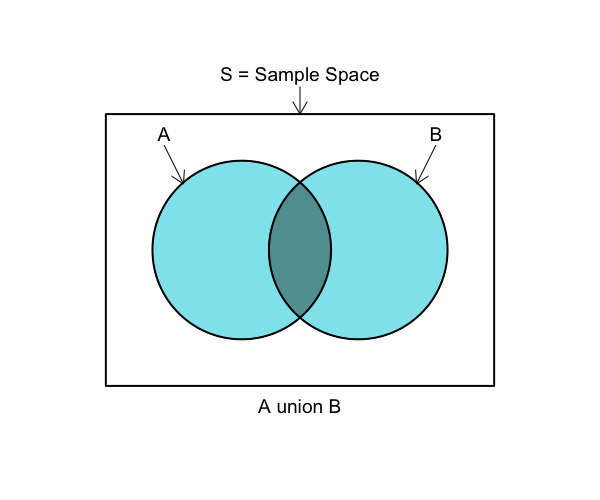

The darker shaded region on the venn diagram visualizes the overlap of each event, portraying the area to be counted twice. To account for this, when calculating A∪B, simply substract AB from P(A)+P(B). See the definition of the inclusion-exclusion principle for two events below:
P(A∪B)=P(A)+P(B)−P(AB)

# Plotting

lets look at some basic plotting. 

Text(0.5, 0, 'Heads or Tails')

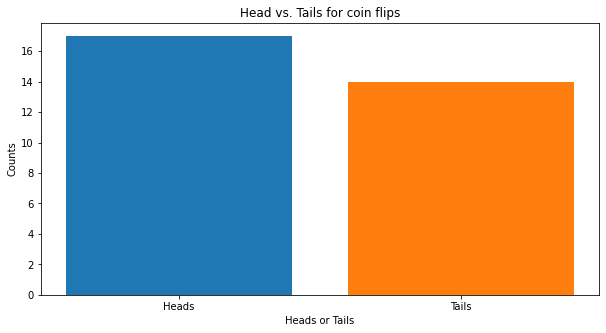

In [ ]:
# when plotting with matplotlib.pyplot, you need to 
# instantiate your figure and axes as follows:
fig, ax = plt.subplots( figsize = (10,5))

# use .bar for barplots!
plt.bar(x = 'Heads', height = count_heads)
plt.bar(x = 'Tails', height = count_tails)

ax.set_title('Head vs. Tails for coin flips')
ax.set_ylabel('Counts')
ax.set_xlabel('Heads or Tails')

# Because we are working with a .5 probability for each outcome, we can expect
# that the bars will be either the same height or very close

In [ ]:
# Now lets see what happens with a skewed probability
# use p to set the bias
def flip_biased(p):
    return random.random() < p

c1 = 0
c2 = 0

for i in range(1000):

    if flip_biased(0.7):
        c1 += 1
    if flip_biased(0.25):
        c2 += 1

Text(0.5, 0, 'Heads or Tails')

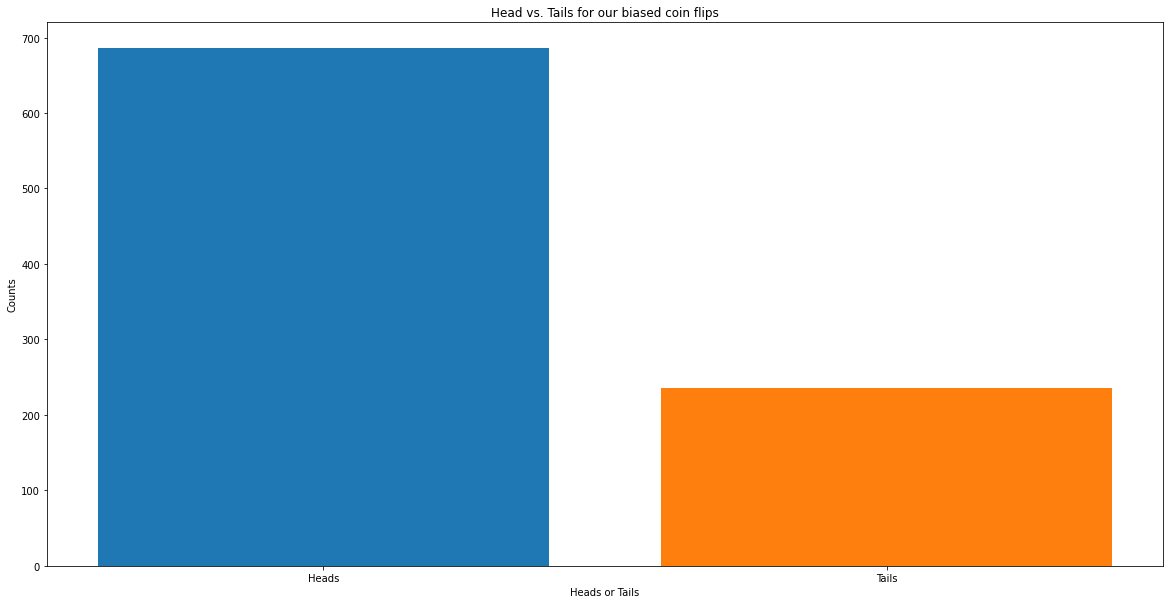

In [ ]:
fig, ax = plt.subplots( figsize = (20,10))

# use .bar for barplots!
plt.bar(x = 'Heads', height = c1)
plt.bar(x = 'Tails', height = c2)

ax.set_title('Head vs. Tails for our biased coin flips')
ax.set_ylabel('Counts')
ax.set_xlabel('Heads or Tails')